# ECG

#### Coleta: 20/08/2021
#### Tratamento: 20/09/2021
#### Usuário: Bianca (eu)

## Descrição

#### As medidas foram feitas com o usuário deitado com o mínimo de movimentos possíveis. Os dados são coletados pelo sensor AD8232 e transmitidos via Bluetooth para o computador.

## Eletrodos

#### 3M novos posicionados em ambos os braços e no tórax.
<br>
<img src="ECG-3-lead-electrode-ECG.png" alt="ECG com 3 eletrodos" style="width: 300px">

In [1]:
# Importando as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Definindo a taxa de amostragem
sample_rate = 191

### Tratamento dos dados

In [3]:
data = hp.get_data('ecg_20-08_1.txt')

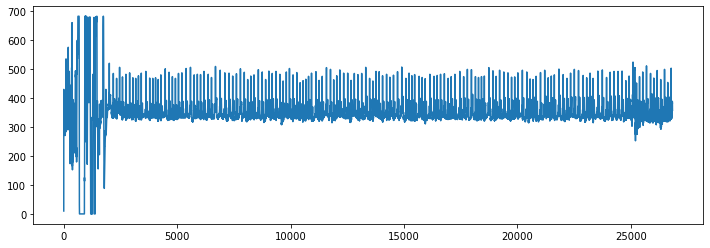

In [4]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

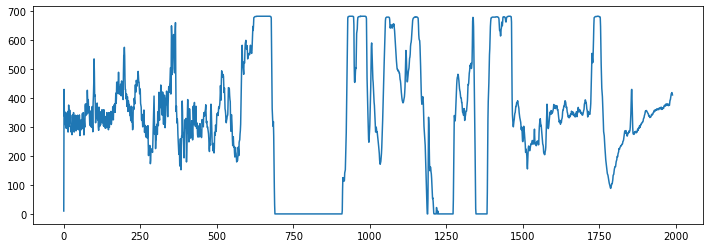

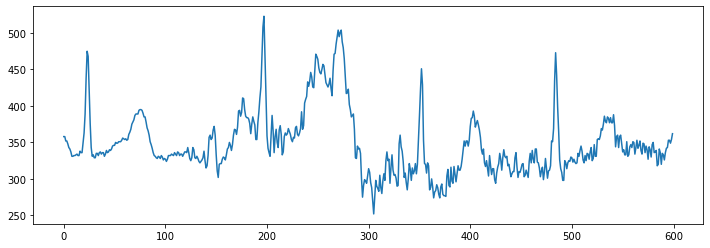

In [5]:
plt.figure(figsize=(12,4))
plt.plot(data[0:1990])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data[24900:25500])
plt.show()

In [6]:
data_wn = data[1900:24990]
data_wn

array([352., 355., 353., ..., 342., 336., 332.])

In [7]:
def minmax_norm(data_input):
    return (data_input - data_input.min()) / (data_input.max() - data_input.min())

data_norm = minmax_norm(data_wn)

print(data_norm)

[0.21226415 0.22641509 0.21698113 ... 0.16509434 0.13679245 0.11792453]


In [8]:
df = pd.DataFrame(data_norm)
df

,0
0,0.212264
1,0.226415
2,0.216981
3,0.231132
4,0.231132
...,...
23085,0.207547
23086,0.188679
23087,0.165094
23088,0.136792


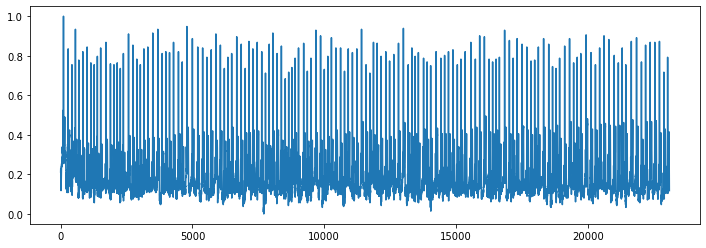

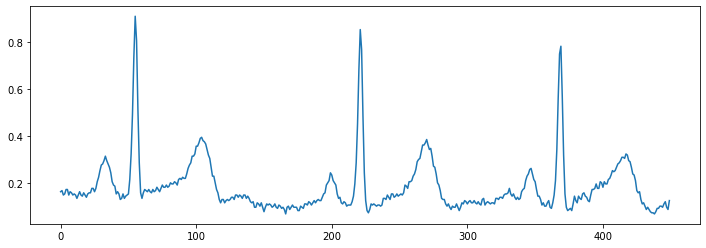

In [18]:
plt.figure(figsize=(12,4))
plt.plot(data_norm)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data_norm[2520:2970])
plt.show()

In [10]:
enhanced = hp.enhance_peaks(data_norm, iterations=2)

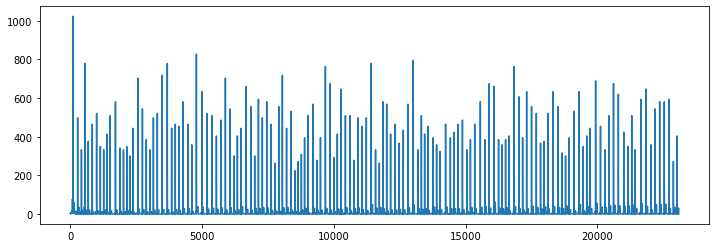

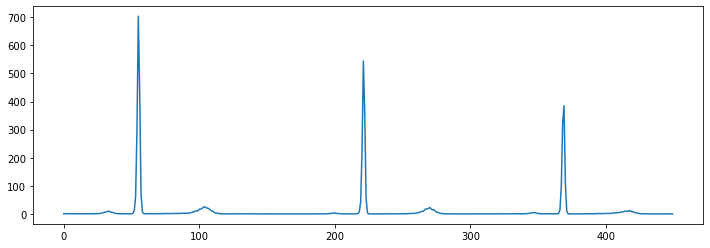

In [19]:
plt.figure(figsize=(12,4))
plt.plot(enhanced)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(enhanced[2520:2970])
plt.show()

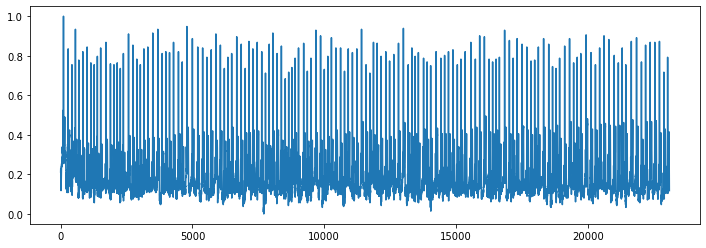

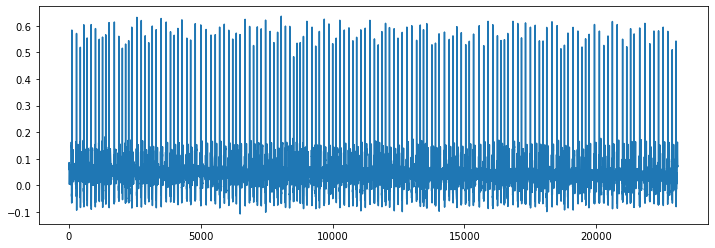

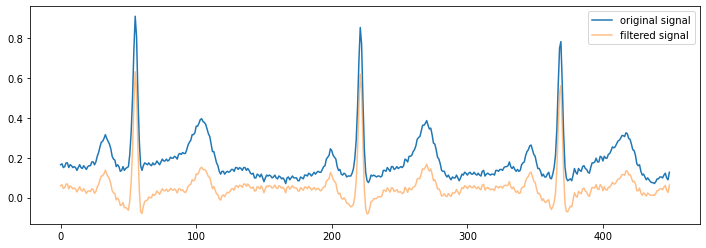

In [21]:
filtered = hp.filter_signal(data_norm, cutoff = 0.02, sample_rate = sample_rate, filtertype='notch')

plt.figure(figsize=(12,4))
plt.plot(data_norm)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data_norm[2520:2970], label = 'original signal')
plt.plot(filtered[2520:2970], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

In [13]:
enhanced_pos = hp.enhance_peaks(filtered, iterations=2)

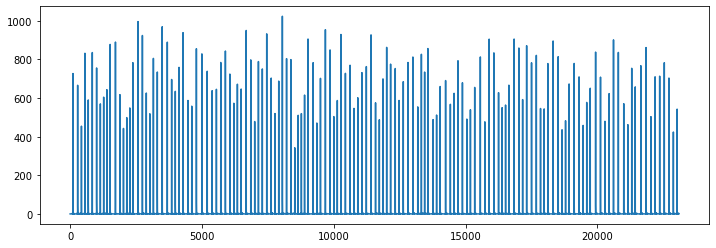

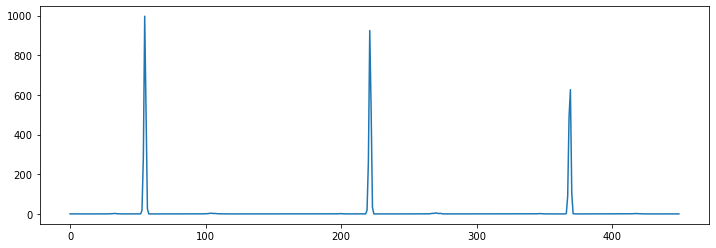

In [22]:
plt.figure(figsize=(12,4))
plt.plot(enhanced_pos)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(enhanced_pos[2520:2970])
plt.show()

bpm: 71.625000
ibi: 837.696335
sdnn: 126.602653
sdsd: 100.837762
rmssd: 150.873685
pnn20: 0.885496
pnn50: 0.656489
hr_mad: 99.476440
sd1: 106.668473
sd2: 143.998314
s: 48255.115255
sd1/sd2: 0.740762
breathingrate: 0.233333


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

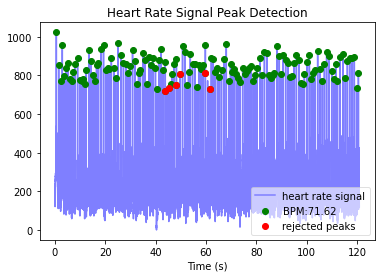

In [23]:
#run analysis
wd, m = hp.process(hp.scale_data(data_norm), sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

Os índices estatísticos, no domínio do tempo, obtidos pela determinação de intervalos RR correspondentes em qualquer ponto no tempo, são:

a) SDNN - Desvio padrão de todos os intervalos RR normais gravados em um intervalo de tempo, expresso em ms;

b) SDANN - Representa o desvio padrão das médias dos intervalos RR normais, a cada 5 minutos, em um intervalo de tempo, expresso em ms;

c) SDNNi - É a média do desvio padrão dos intervalos RR normais a cada 5 minutos, expresso em ms;

d) rMSSD - É a raiz quadrada da média do quadrado das diferenças entre intervalos RR normais adjacentes, em um intervalo de tempo, expresso em ms;

e) pNN50 - Representa a porcentagem dos intervalos RR adjacentes com diferença de duração maior que 50ms.